In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
a, b, d, n_input = 1, 8, 0.3, 5

In [495]:
def f(x):
    global a, b, d
    return a * np.sin(b * x) + d; 

In [617]:
amount = 30
tspan = [0, np.pi / 4]

step = (tspan[1] - tspan[0]) / amount
X = np.array([_ * step for _ in range(0, amount, 1)])
y = np.array([f(_) for _ in X])
n = y.shape[0] - n_input - 1

X_train = np.empty((n, n_input), dtype=float)
y_train = np.empty(n, dtype=float)

for i in range(n):
    for j in range(0, n_input, 1):
        X_train[i][j] = y[i + j]
    y_train[i] = y[i + n_input]
    
X = np.array([tspan[1] + _ * step for _ in range(0, amount, 1)])
y = np.array([f(_) for _ in X])
    
X_test = np.empty((n, n_input), dtype=float)
y_test = np.empty(n, dtype=float)

for i in range(n):
    for j in range(0, n_input, 1):
        X_test[i][j] = y[i + j]
    y_test[i] = y[i + n_input]
    
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(24, 5) (24,) (24, 5) (24,)


In [638]:
class Model:
    
    def __init__(self):
        self.w = None
        self.lr = None
        self.n_input = None 

    def fit(self, X_train, y_train, lr=0.01, n_input=5, epoches=100, e=1e-3):
        
        self.lr = lr
        self.n_input = n_input
        self.epoches = epoches
        
        self.w = np.random.uniform(-1, 1, n_input + 1)
        
        X_train = np.array([np.concatenate((_, [1])) for _ in X_train])
                    
        loss = []
        pbar = tqdm(range(epoches))
        for ep in pbar:
            y_pred = np.empty(n, dtype=float)
            for i in range(len(X_train)):
                y_pred[i] = self.predict(self, X_train[i])
                self.w -= lr * self.grad(self, X_train[i], y_pred[i], y_train[i])
            loss.append(self.mse(self, y_pred, y_train))
            if loss[-1] < e:
                break
            pbar.set_description(f"epoch: {ep}/{epoches - 1} loss: {loss[-1]}")
            
        plt.plot(range(len(loss)), loss) 
        plt.show()  
                
    
    def mse(self, y_pred, y_real):
        return 1 / 2 * np.sum(np.square(y_pred - y_real))
    
    def predict(self, X):
        if X.shape[0] < self.n_input + 1:
            X = np.concatenate((X, np.ones(1)), axis=0)
        return self.w @ X
    
    def grad(self, X, y_pred, y_real):
        return (y_pred - y_real) * X
        
    def W(self):
        return self.w

In [639]:
model = Model

epoch: 12/99 loss: 1.137797023858638e-09:  13%|████▉                                 | 13/100 [00:00<00:00, 582.24it/s]


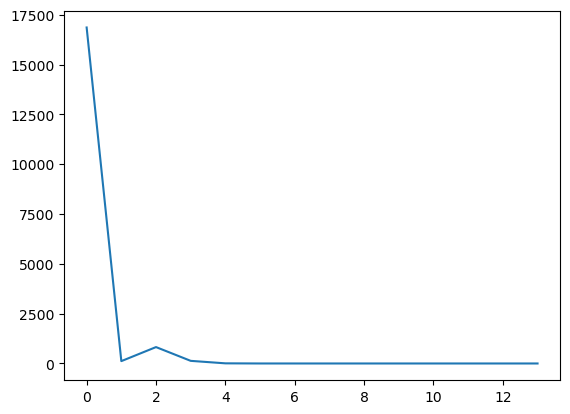

In [672]:
model.fit(model, X_train, y_train, lr=0.37, n_input=n_input, epoches=100, e=1e-9)

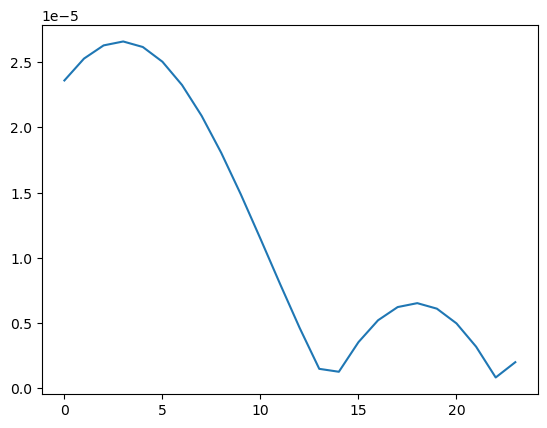

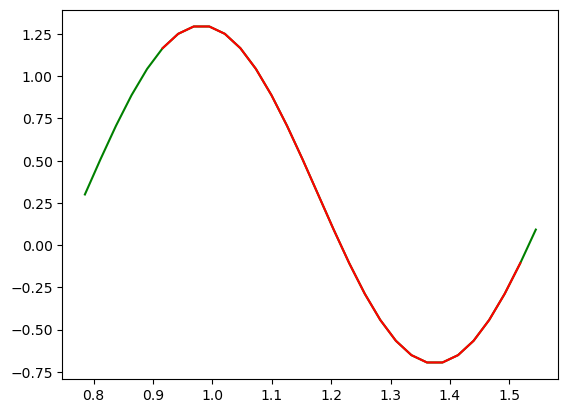

In [655]:
y_pred = []
diff = []
for _ in range(y_test.shape[0]):
    y_pred.append(model.predict(model, X_test[_]))
    diff.append(abs(y_pred[_] - y_test[_]))
plt.plot(range(len(diff)), diff) 
plt.show()
plt.plot(X, y, color='green') 
plt.plot(X[n_input:-1], y_pred, color='red') 
plt.show()

In [580]:
print(model.w)

[-0.43066129 -0.28616461  0.74169664 -0.10263898  0.92065077  0.04713524]
